# Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt
import time
import scipy.cluster.hierarchy as sh
import pprint
import sklearn as sc


from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN




In [2]:
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
dataset = pd.read_csv('/Users/tanishq/Downloads/Customer--Segmentation-MajorProject-main/online_retail_dataset.csv', 

                     header= 0,encoding= 'unicode_escape')

In [4]:
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
dataset.columns = ['Invoice', 'ProductCode', 'Desc', 'Qnt','InvoiceDate','Price','CustID','Country']

In [7]:
dataset.head(10)

,Invoice,ProductCode,Desc,Qnt,InvoiceDate,Price,CustID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [8]:
dataset.shape

(541909, 8)

In [9]:
dataset.isnull().sum()

Invoice             0
ProductCode         0
Desc             1454
Qnt                 0
InvoiceDate         0
Price               0
CustID         135080
Country             0
dtype: int64

In [10]:
final_data = dataset.dropna()

In [11]:
final_data.isnull().sum()

Invoice        0
ProductCode    0
Desc           0
Qnt            0
InvoiceDate    0
Price          0
CustID         0
Country        0
dtype: int64

In [12]:
final_data.shape

(406829, 8)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406829 non-null  object 
 1   ProductCode  406829 non-null  object 
 2   Desc         406829 non-null  object 
 3   Qnt          406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   Price        406829 non-null  float64
 6   CustID       406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [14]:
final_data.head(10)

,Invoice,ProductCode,Desc,Qnt,InvoiceDate,Price,CustID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [15]:
final_data['Invoice'] = final_data['Invoice'].astype('string')
final_data['ProductCode'] = final_data['ProductCode'].astype('string')
final_data['Desc'] = final_data['Desc'].astype('string')
final_data['InvoiceDate'] = pd.to_datetime(final_data['InvoiceDate'], format='%d-%m-%Y %H:%M')
final_data['Country'] = final_data['Country'].astype('string')



In [16]:
final_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406829 non-null  string        
 1   ProductCode  406829 non-null  string        
 2   Desc         406829 non-null  string        
 3   Qnt          406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   Price        406829 non-null  float64       
 6   CustID       406829 non-null  float64       
 7   Country      406829 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 27.9 MB


In [17]:
duplicateRows = final_data[final_data.duplicated()]
duplicateRows.shape

(5225, 8)

In [18]:
final_data = final_data.drop_duplicates()
final_data.shape

(401604, 8)

In [19]:
final_data.nunique()

Invoice        22190
ProductCode     3684
Desc            3896
Qnt              436
InvoiceDate    20460
Price            620
CustID          4372
Country           37
dtype: int64

In [20]:
orders_by_country = final_data.groupby('Country', as_index=False)['InvoiceDate'].count().sort_values('InvoiceDate')

In [21]:
orders_by_country.columns = ['Country', 'Number of transactions']


In [22]:
orders_by_country

,Country,Number of transactions
28,Saudi Arabia,10
2,Bahrain,17
8,Czech Republic,30
4,Brazil,32
21,Lithuania,35
20,Lebanon,45
27,RSA,58
11,European Community,61
34,United Arab Emirates,68
22,Malta,127


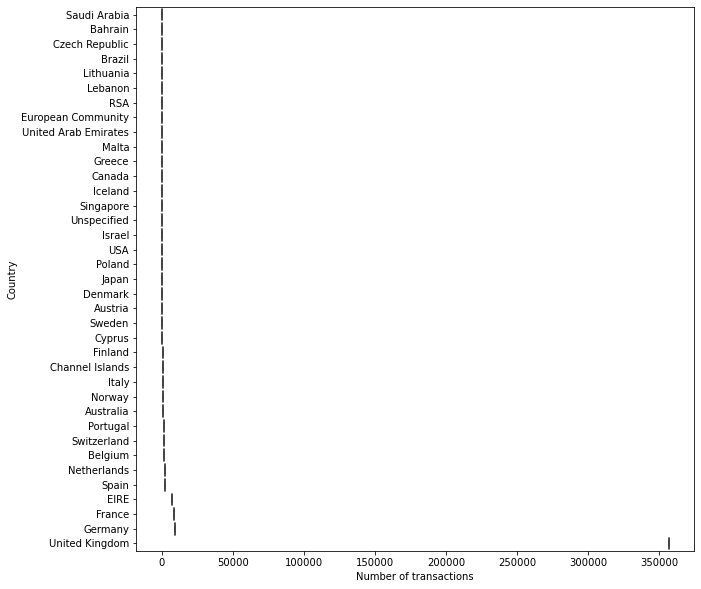

In [23]:
fig = plt.figure(figsize=(10, 10))
y_axis = orders_by_country['Country']
x_axis = orders_by_country['Number of transactions']
sn.boxplot(x_axis, y_axis)



In [24]:
new_data = final_data.loc[final_data['Country'] == 'United Kingdom']
new_data.describe().round(3)


,Qnt,Price,CustID
count,356728.000,356728.000,356728.000
mean,11.199,3.268,15543.795
std,264.998,71.162,1594.286
min,-80995.000,0.000,12346.000
25%,2.000,1.250,14191.000
50%,4.000,1.950,15513.000
75%,12.000,3.750,16931.000
max,80995.000,38970.000,18287.000


In [25]:
new_data = new_data[(new_data['Price']>0)]
new_data.shape

(356704, 8)

In [26]:
new_data.nunique()

Invoice        19854
ProductCode     3661
Desc            3860
Qnt              425
InvoiceDate    18438
Price            568
CustID          3949
Country            1
dtype: int64

In [27]:
# totalitem = england.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
# totalitem.columns = ['CustomerID', 'InvoiceNo', 'item_ea']
# totalitem.sort_values('item_ea')

In [28]:
new_data['Total'] = new_data['Qnt'] * new_data['Price']
new_data.describe().round(3)


,Qnt,Price,CustID,Total
count,356704.000,356704.000,356704.000,356704.000
mean,11.164,3.268,15543.845,18.915
std,264.175,71.165,1594.268,455.172
min,-80995.000,0.001,12346.000,-168469.600
25%,2.000,1.250,14191.000,3.900
50%,4.000,1.950,15513.000,10.200
75%,12.000,3.750,16931.000,17.700
max,80995.000,38970.000,18287.000,168469.600


# RFM 

In [29]:
recent = max(new_data['InvoiceDate'])
recent

Timestamp('2011-12-09 12:49:00')

In [30]:
recent_dt = dt.datetime(2011,12,10)
oldest_dt = new_data['InvoiceDate'].min()
oldest_dt

Timestamp('2010-12-01 08:26:00')

In [31]:
new_data['recency'] = recent_dt - new_data['InvoiceDate']
new_data.head(10)

,Invoice,ProductCode,Desc,Qnt,InvoiceDate,Price,CustID,Country,Total,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 15:34:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 15:34:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 15:34:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 15:34:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 15:34:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373 days 15:34:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373 days 15:34:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373 days 15:32:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373 days 15:32:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373 days 15:26:00


In [32]:
rfm = new_data.groupby('CustID').agg(
    {'InvoiceDate': lambda x: (recent_dt - x.max()).days, 'Invoice': lambda x: len(x), 'Total': lambda x: x.sum()}).sort_values('CustID')

In [33]:
rfm.columns = ['rec','freq','monetary']

In [34]:
rfm

,rec,freq,monetary
CustID,,,
12346.0,325,2,0.00
12747.0,2,103,4196.01
12748.0,0,4458,28405.56
12749.0,3,231,3868.20
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


Text(0.5, 0, 'Attributes')

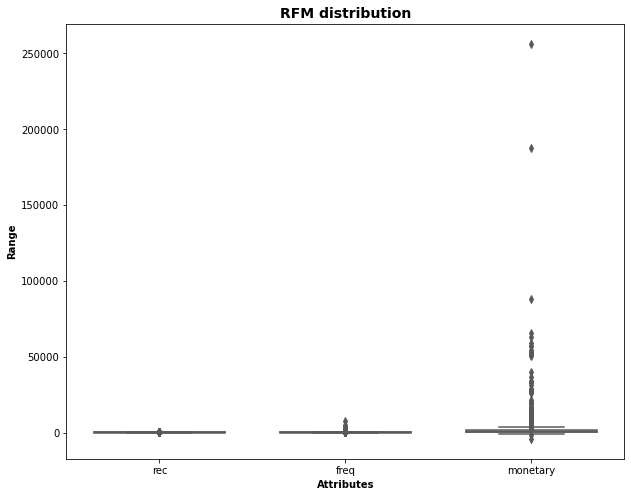

In [35]:
attri = ['rec','freq','monetary']
plt.rcParams['figure.figsize'] = [10,8]
sn.boxplot(data = rfm[attri], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("RFM distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')




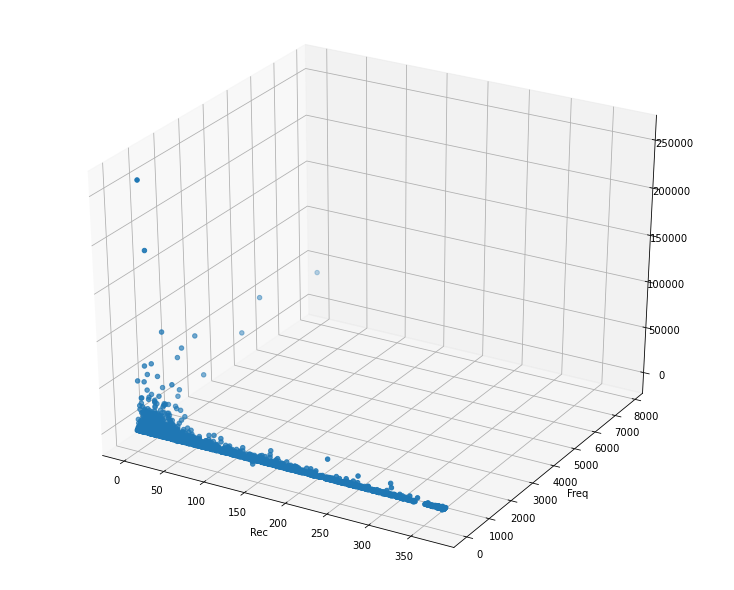

In [36]:
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure()
axes = Axes3D(figure)
axes.scatter(rfm['rec'], rfm['freq'], rfm['monetary'])
plt.xlabel('Rec')
plt.ylabel('Freq')
plt.show()


# Removing Outliners for RFM

In [37]:
 # For Monetary

rfm_First = rfm.monetary.quantile(0.05)
rfm_Third = rfm.monetary.quantile(0.95)
Net = rfm_Third - rfm_First

rfm = rfm[(rfm.monetary >= rfm_First - 1.5*Net) & (rfm.monetary <= rfm_Third + 1.5*Net)]

  # For Recency 

rfm_First = rfm.rec.quantile(0.05)
rfm_Third = rfm.rec.quantile(0.95)
Net = rfm_Third - rfm_First
rfm = rfm[(rfm.rec >= rfm_First - 1.5*Net) & (rfm.rec <= rfm_Third + 1.5*Net)]

  # For Frequency
    
rfm_First = rfm.freq.quantile(0.05)
rfm_Third = rfm.freq.quantile(0.95)
Net = rfm_Third - rfm_First
rfm = rfm[(rfm.freq >= rfm_First - 1.5*Net) & (rfm.freq <= rfm_Third + 1.5*Net)]

# After Removing Outliners

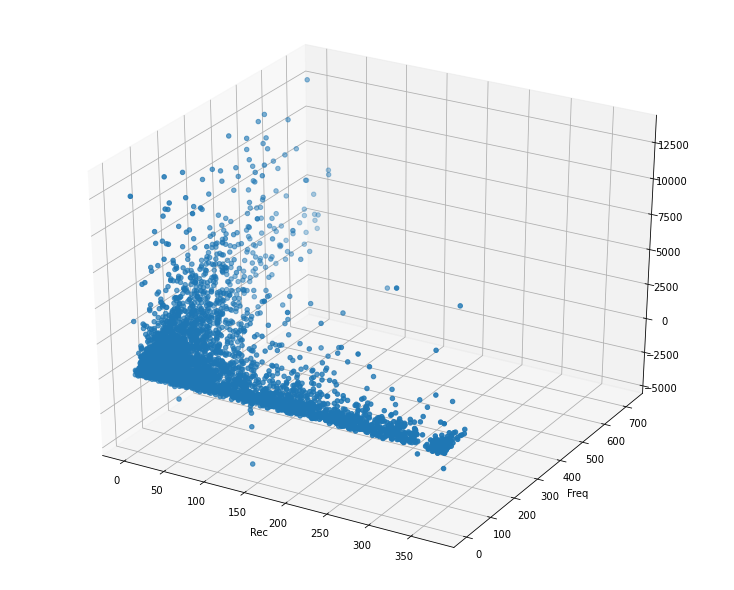

In [38]:
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure()
axes = Axes3D(figure)
axes.scatter(rfm['rec'], rfm['freq'], rfm['monetary'])
plt.xlabel('Rec')
plt.ylabel('Freq')
plt.show()

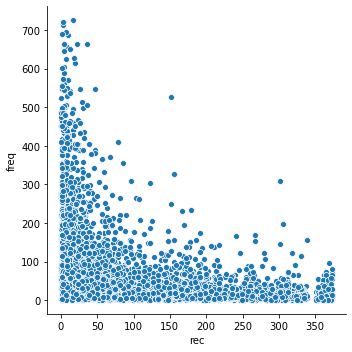

In [39]:
# Recency vs Freq 
sn.relplot(x="rec", y="freq", data=rfm);

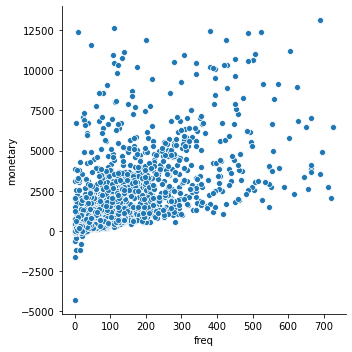

In [40]:
# Freq vs Monetary 
sn.relplot(x="freq", y="monetary", data=rfm);


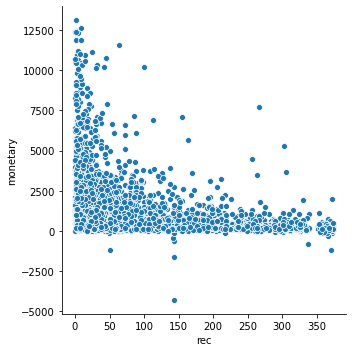

In [41]:
# Recency vs Monetary 


sn.relplot(x="rec", y="monetary", data=rfm);



In [42]:
rfm.describe().round(3)



,rec,freq,monetary
count,3881.000,3881.000,3881.000
mean,92.774,76.357,1202.261
std,100.455,99.924,1654.400
min,0.000,1.000,-4287.630
25%,17.000,16.000,275.400
50%,50.000,39.000,609.300
75%,147.000,95.000,1431.780
max,373.000,725.000,13110.020


# Hierarchical clustering


## Standard scaler

In [43]:
rfm_dataframe = rfm[['rec', 'freq', 'monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_dataframe)
rfm_scaled.shape
rfm_scaled_new = pd.DataFrame({'rec': rfm_scaled[:, 0], 'freq': rfm_scaled[:, 1], 'monetary': rfm_scaled[:, 1] })
rfm_scaled_new.head()

,rec,freq,monetary
0,2.312049,-0.744230,-0.744230
1,-0.903749,0.266665,0.266665
2,-0.893793,1.547799,1.547799
3,-0.893793,-0.173725,-0.173725
4,1.206929,-0.704195,-0.704195


###  WARDS METHOD 

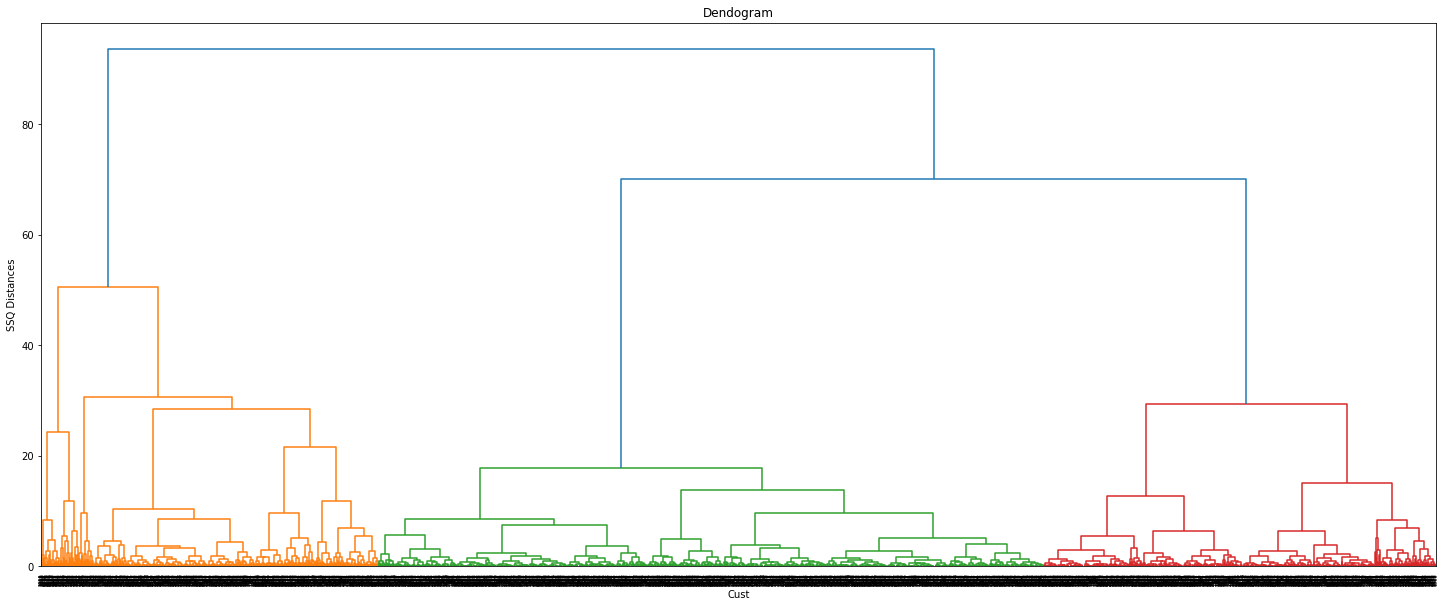

In [44]:
s_time = time.time()
figure = plt.figure(figsize=(25, 10))
dendogram = sh.dendrogram(sh.linkage(rfm_scaled, method = 'ward'))
plt.title("Dendogram")
plt.xlabel("Cust")
plt.ylabel("SSQ Distances")
plt.show()
e_time = time.time()

In [45]:
t_taken = e_time - s_time
print(t_taken)

86.40874981880188


### COMPLETE LINKAGE METHOD 

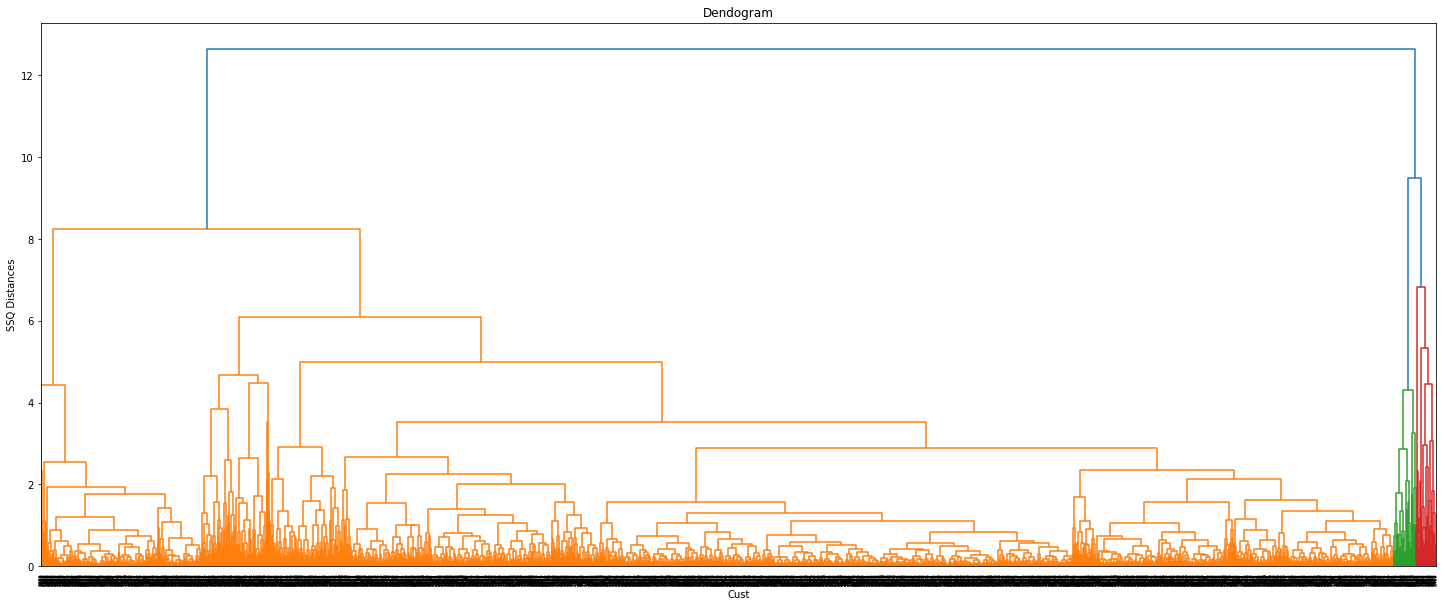

In [46]:
s_time = time.time()
figure = plt.figure(figsize=(25, 10))
dendogram = sh.dendrogram(sh.linkage(rfm_scaled, method = 'complete'))
plt.title("Dendogram")
plt.xlabel("Cust")
plt.ylabel("SSQ Distances")
plt.show()
e_time = time.time()

In [47]:
t_taken = e_time - s_time
print(t_taken)

85.52277898788452


### AVERAGE LINKAGE METHOD

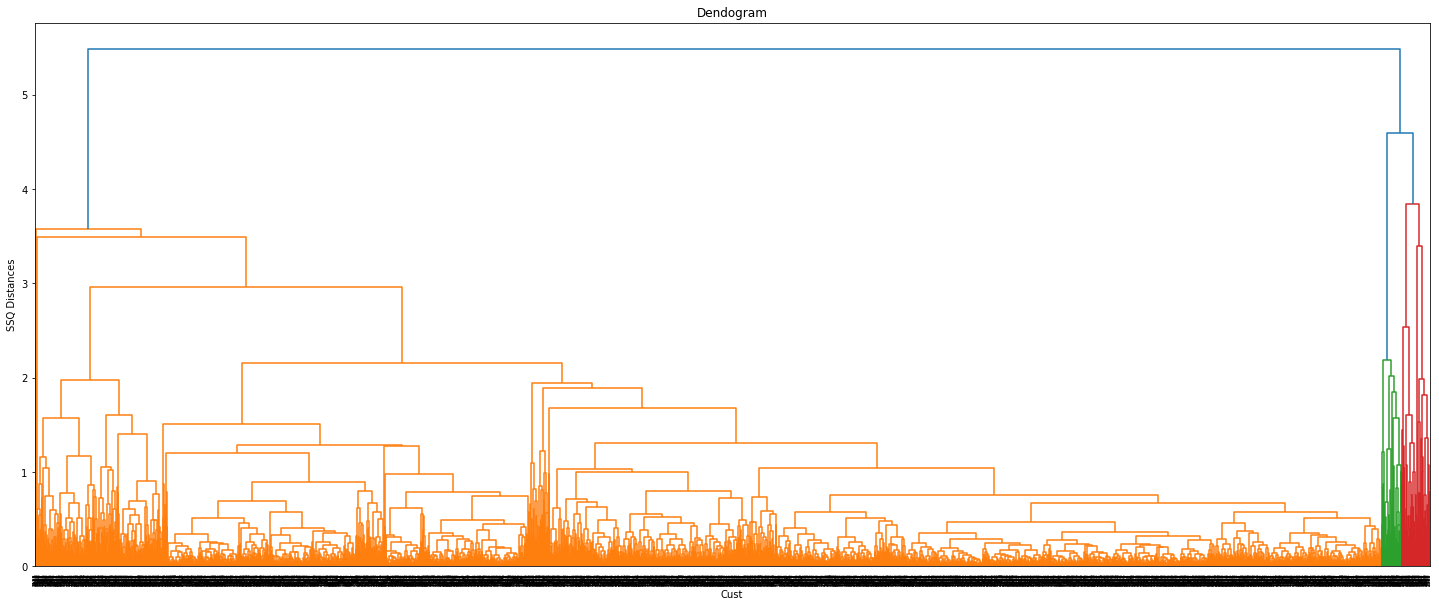

In [48]:
s_time = time.time()
figure = plt.figure(figsize=(25, 10))
dendogram = sh.dendrogram(sh.linkage(rfm_scaled, method = 'average'))
plt.title("Dendogram")
plt.xlabel("Cust")
plt.ylabel("SSQ Distances")
plt.show()
e_time = time.time()

In [49]:
t_taken = e_time - s_time
print(t_taken)

73.25808000564575


## Agglomerative Clustering for 3 clusters

In [50]:
s_time = time.time()
hir = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
pred = hir.fit_predict(rfm_scaled)
t_taken = time.time() - s_time
print(t_taken)

0.4108848571777344


         rec  freq  monetary  AGG Label
CustID                                 
12346.0  325     2      0.00          1
12747.0    2   103   4196.01          0
12749.0    3   231   3868.20          0
12820.0    3    59    942.34          2
12821.0  214     6     92.72          1
...      ...   ...       ...        ...
18280.0  277    10    180.60          1
18281.0  180     7     80.82          1
18282.0    7    13    176.60          2
18283.0    3   721   2045.53          0
18287.0   42    70   1837.28          0

[3881 rows x 4 columns]


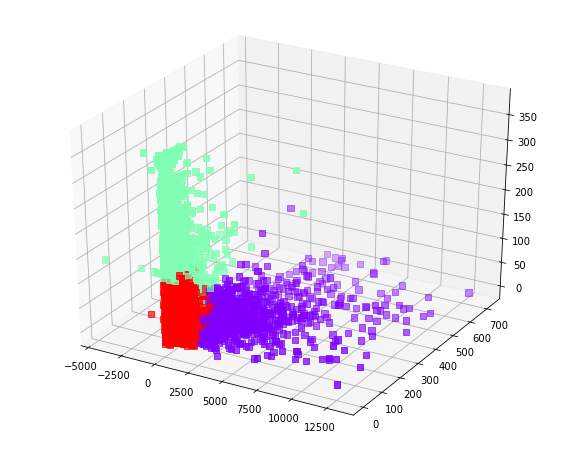

In [51]:
rfm_label= rfm
rfm_label['AGG Label'] = pred
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_label['monetary'])
y = np.array(rfm_label['freq'])
z = np.array(rfm_label['rec'])
print (rfm_label)
ax.scatter(x,y,z, marker="s", c=rfm_label["AGG Label"], s=40, cmap="rainbow")

## Agglomerative Clustering for 4 clusters

In [52]:
s_time = time.time()
hir = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
pred = hir.fit_predict(rfm_scaled)
t_taken = time.time() - s_time
print(t_taken)

0.3284621238708496


         rec  freq  monetary  AGG Label
CustID                                 
12346.0  325     2      0.00          1
12747.0    2   103   4196.01          0
12749.0    3   231   3868.20          0
12820.0    3    59    942.34          2
12821.0  214     6     92.72          1
...      ...   ...       ...        ...
18280.0  277    10    180.60          1
18281.0  180     7     80.82          1
18282.0    7    13    176.60          2
18283.0    3   721   2045.53          3
18287.0   42    70   1837.28          0

[3881 rows x 4 columns]


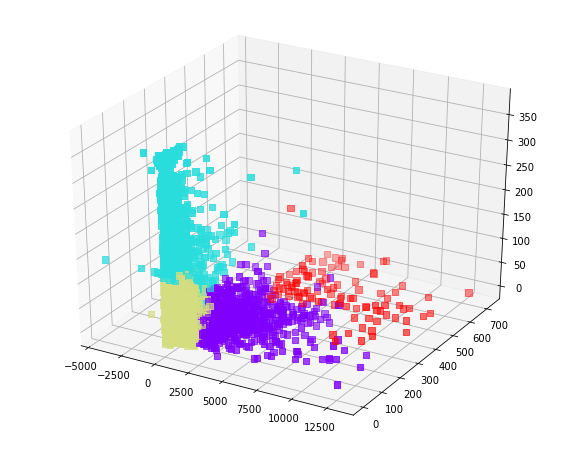

In [53]:
rfm_label= rfm
rfm_label['AGG Label'] = pred
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_label['monetary'])
y = np.array(rfm_label['freq'])
z = np.array(rfm_label['rec'])
print (rfm_label)
ax.scatter(x,y,z, marker="s", c=rfm_label["AGG Label"], s=40, cmap="rainbow")

## Agglomerative Clustering for 5 clusters

In [54]:
s_time = time.time()
hir = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
pred = hir.fit_predict(rfm_scaled)
t_taken = time.time() - s_time
print(t_taken)

0.3311758041381836


         rec  freq  monetary  AGG Label
CustID                                 
12346.0  325     2      0.00          0
12747.0    2   103   4196.01          1
12749.0    3   231   3868.20          1
12820.0    3    59    942.34          2
12821.0  214     6     92.72          0
...      ...   ...       ...        ...
18280.0  277    10    180.60          0
18281.0  180     7     80.82          0
18282.0    7    13    176.60          2
18283.0    3   721   2045.53          3
18287.0   42    70   1837.28          1

[3881 rows x 4 columns]


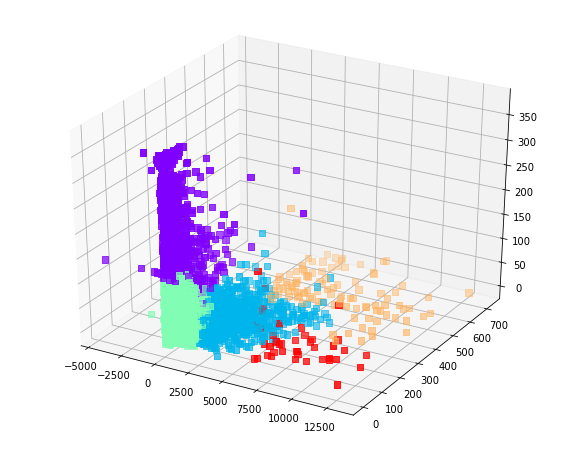

In [55]:
rfm_label= rfm
rfm_label['AGG Label'] = pred
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_label['monetary'])
y = np.array(rfm_label['freq'])
z = np.array(rfm_label['rec'])
print (rfm_label)
ax.scatter(x,y,z, marker="s", c=rfm_label["AGG Label"], s=40, cmap="rainbow")

In [56]:
hir = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
pred = hir.fit_predict(rfm_scaled)
rfm_label= rfm
rfm_label['AGG Label'] = pred


# Silhouette Average 

## Silhouette Average Ward Method (for 3 clusters)



In [57]:
silh_avg = silhouette_score(rfm_scaled, pred)
print("for n=3, (clusters), sil_avg :", silh_avg)

for n=3, (clusters), sil_avg : 0.43244931453273894


In [58]:
sil_sample_values = silhouette_samples(rfm_scaled, pred)
print ("max silhouette_score:-", sil_sample_values.max(),
       'min silhouette_score:-', sil_sample_values.min())

max silhouette_score:- 0.7674892494064572 min silhouette_score:- -0.6155073922212123


# K-Means Clustering 

## Elbow Method

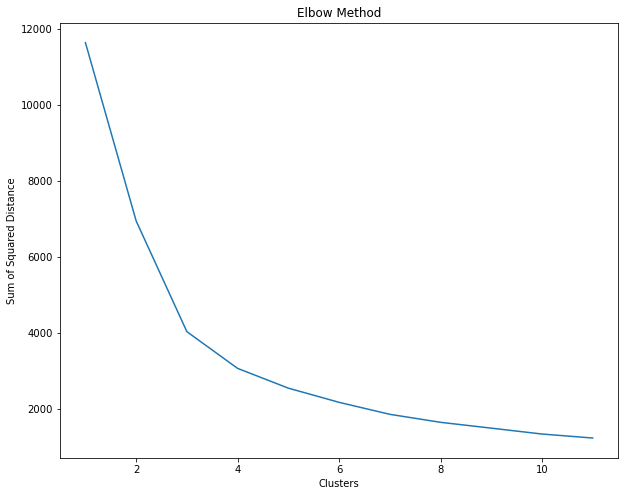

In [59]:
dist = []
for i in range (1, 12):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(rfm_scaled)
    dist.append(kmeans.inertia_)

    
plt.plot(range(1,12), dist)

plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Distance')
plt.show()


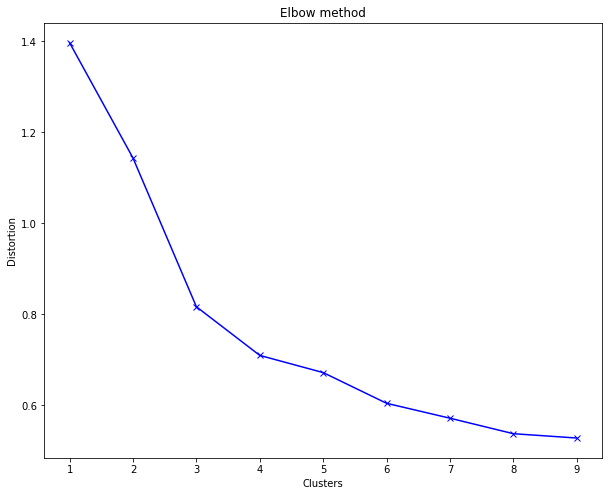

Cluster 1 -> 1.3970020872539732
Cluster 2 -> 1.1437234064218613
Cluster 3 -> 0.8168596148756693
Cluster 4 -> 0.7099239655236527
Cluster 5 -> 0.6721712554180213
Cluster 6 -> 0.6047002921553964
Cluster 7 -> 0.5719358841176744
Cluster 8 -> 0.5379064363991939
Cluster 9 -> 0.5284033317576506


In [60]:
distort = []

for k in range(1,10):
    
    k_model = KMeans(n_clusters=k).fit(rfm_scaled)
    k_model.fit(rfm_scaled)
    
    distort.append(sum(np.min(cdist(rfm_scaled, k_model.cluster_centers_,'euclidean'),axis=1)) / rfm_scaled.shape[0])
    
K = range(1,10)




plt.plot(K, distort, 'bx-') 
plt.xlabel('Clusters') 
plt.ylabel('Distortion') 
plt.title('Elbow method') 
plt.show() 

a = 1
for i in distort:

    print("Cluster",a,"->",i)
    a = a+1


In [61]:
for n in range(2,8):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(rfm_scaled)
    
    labels = kmeans.labels_
    
    silh_avg = silhouette_score(rfm_scaled, labels)
    print("Cluster = {0}, the avg silhouette score -> {1}".format(n, silh_avg))

Cluster = 2, the avg silhouette score -> 0.5432601251196262
Cluster = 3, the avg silhouette score -> 0.5071629229515692
Cluster = 4, the avg silhouette score -> 0.47788977662545745
Cluster = 5, the avg silhouette score -> 0.4656715818138514
Cluster = 6, the avg silhouette score -> 0.419478619738301
Cluster = 7, the avg silhouette score -> 0.4219151271439948


In [62]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
start_time = time.time()
y_kmeans = kmeans.fit_predict(rfm_scaled)
time_taken = time.time() - start_time
print(time_taken)

0.07951092720031738


In [63]:
rfm_scaled_new = pd.DataFrame({'recency': rfm_scaled[:, 0], 'freq': rfm_scaled[:, 1], 'monetary': rfm_scaled[:, 1] })
rfm['Cluster_Id'] = y_kmeans
rfm.head()

,rec,freq,monetary,AGG Label,Cluster_Id
CustID,,,,,
12346.0,325,2,0.00,1,1
12747.0,2,103,4196.01,0,2
12749.0,3,231,3868.20,0,2
12820.0,3,59,942.34,2,0
12821.0,214,6,92.72,1,1


In [64]:
rfm_scaled_new.head()

,recency,freq,monetary
0,2.312049,-0.744230,-0.744230
1,-0.903749,0.266665,0.266665
2,-0.893793,1.547799,1.547799
3,-0.893793,-0.173725,-0.173725
4,1.206929,-0.704195,-0.704195


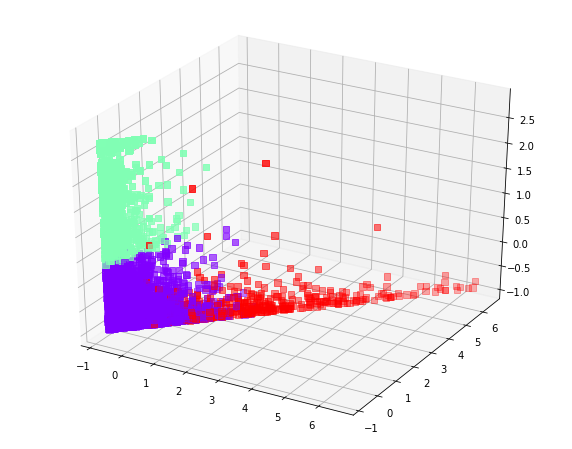

In [65]:
rfm_kmeans_scalled= rfm_scaled_new
rfm_kmeans_scalled['Label'] = y_kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_kmeans_scalled['monetary'])
y = np.array(rfm_kmeans_scalled['freq'])
z = np.array(rfm_kmeans_scalled['recency'])
ax.scatter(x,y,z, marker="s", c=rfm_kmeans_scalled["Label"], s=40, cmap="rainbow")

In [66]:
silhouette_k_means = silhouette_samples(rfm_scaled_new, y_kmeans)
print ("Max score", silhouette_k_means.max(),
       'Min score', silhouette_k_means.min())

Max score 0.7290339709242768 Min score -0.6354905411493141


In [67]:
silhouette_avg_kmeans = silhouette_score(rfm_scaled_new, y_kmeans)
print("for 3 cluster, avg score", silhouette_avg_kmeans)

for 3 cluster, avg score 0.5799063534741625


# DBSCAN (Density-based spatial clustering of applications with noise)

In [68]:
rfm_scaled_new

,recency,freq,monetary,Label
0,2.312049,-0.744230,-0.744230,1
1,-0.903749,0.266665,0.266665,2
2,-0.893793,1.547799,1.547799,2
3,-0.893793,-0.173725,-0.173725,0
4,1.206929,-0.704195,-0.704195,1
...,...,...,...,...
3876,1.834159,-0.664159,-0.664159,1
3877,0.868424,-0.694186,-0.694186,1
3878,-0.853969,-0.634133,-0.634133,0
3879,-0.893793,6.452142,6.452142,2


In [69]:
rfm_scaled_new = pd.DataFrame(rfm_scaled_new)
rfm_scaled_new.columns = ['monetary', 'freq', 'recency','label']
rfm_scaled_new.head()
dbscan = DBSCAN(eps=0.5, min_samples = 6)
start_time = time.time()
model= dbscan.fit(rfm_scaled_new)
time_taken = time.time() - start_time
print(time_taken)
labels = model.labels_
rfm['db_labels'] = labels

0.1286931037902832


In [70]:
cores = np.zeros_like(labels,dtype='bool')
cores[dbscan.core_sample_indices_] = True
clusters = len(set(labels))-(1 if -1 in labels else 0)
print(clusters)

3


In [71]:
print(silhouette_score(rfm_scaled_new,labels))


0.5656583858777142


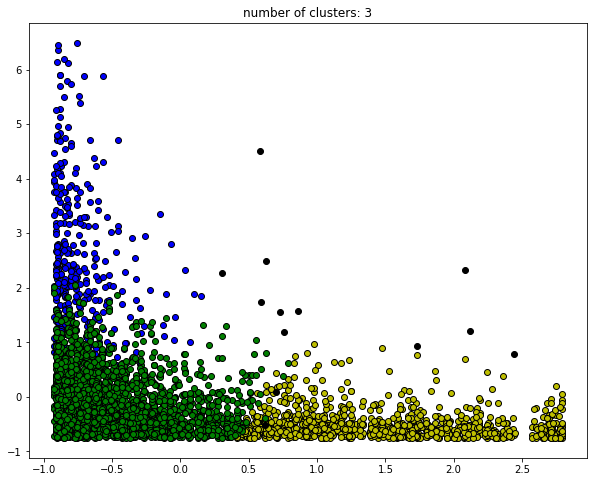

In [72]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'c', 'm' ] 
for n, c in zip(unique_labels, colors): 
    if n == -1: 
         
        c = 'k'
    class_member_mask = (labels == n) 
  
    xy = rfm_scaled_new[class_member_mask & cores] 
    plt.plot(xy['monetary'], xy['freq'], 'o', markerfacecolor=c, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = rfm_scaled_new[class_member_mask & ~cores] 
    plt.plot(xy['monetary'], xy['freq'], 'o', markerfacecolor=c, 
                                      markeredgecolor='k', 
                                      markersize=6) 
plt.title('number of clusters: %d' %3) 
plt.show() 

In [73]:
rfm_df_labelled= rfm_scaled_new 
rfm_df_labelled['label'] = labels

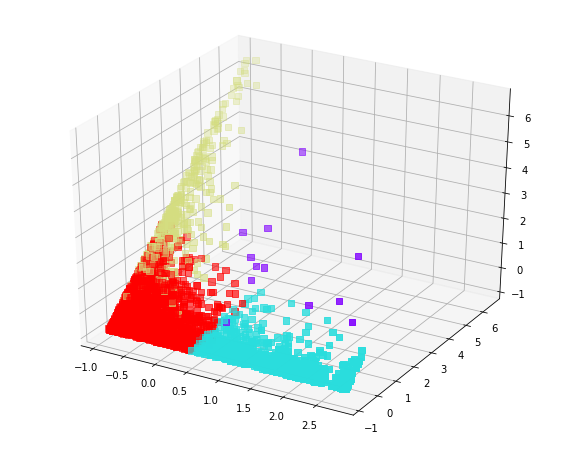

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_df_labelled['monetary'])
y = np.array(rfm_df_labelled['freq'])
z = np.array(rfm_df_labelled['recency'])
ax.scatter(x,y,z, marker="s", c=rfm_df_labelled['label'], s=40, cmap="rainbow")

In [75]:
rfm

,rec,freq,monetary,AGG Label,Cluster_Id,db_labels
CustID,,,,,,
12346.0,325,2,0.00,1,1,0
12747.0,2,103,4196.01,0,2,1
12749.0,3,231,3868.20,0,2,1
12820.0,3,59,942.34,2,0,2
12821.0,214,6,92.72,1,1,0
...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,0
18281.0,180,7,80.82,1,1,0
18282.0,7,13,176.60,2,0,2


# Gaussian Mixture Model

In [76]:
df_new_gaussian = rfm[['monetary', 'freq','rec']]

In [77]:
df_new_gaussian

,monetary,freq,rec
CustID,,,
12346.0,0.00,2,325
12747.0,4196.01,103,2
12749.0,3868.20,231,3
12820.0,942.34,59,3
12821.0,92.72,6,214
...,...,...,...
18280.0,180.60,10,277
18281.0,80.82,7,180
18282.0,176.60,13,7


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
 


d = df_new_gaussian
 



In [79]:
start_time = time.time()


gmm = GaussianMixture(n_components = 3)
 

gmm.fit(d)
 
labels = gmm.predict(d)
d['g_labels']= labels
d0 = d[d['g_labels']== 0]
d1 = d[d['g_labels']== 1]
d2 = d[d['g_labels']== 2]

time_taken = time.time() - start_time

print(time_taken)

0.10338115692138672


In [80]:
print(gmm.lower_bound_)
print(gmm.n_iter_)

-18.80355837495694
25


In [81]:
d

,monetary,freq,rec,g_labels
CustID,,,,
12346.0,0.00,2,325,0
12747.0,4196.01,103,2,1
12749.0,3868.20,231,3,1
12820.0,942.34,59,3,2
12821.0,92.72,6,214,0
...,...,...,...,...
18280.0,180.60,10,277,0
18281.0,80.82,7,180,0
18282.0,176.60,13,7,0


In [82]:
print(silhouette_score(d,labels))

0.34158031904444325


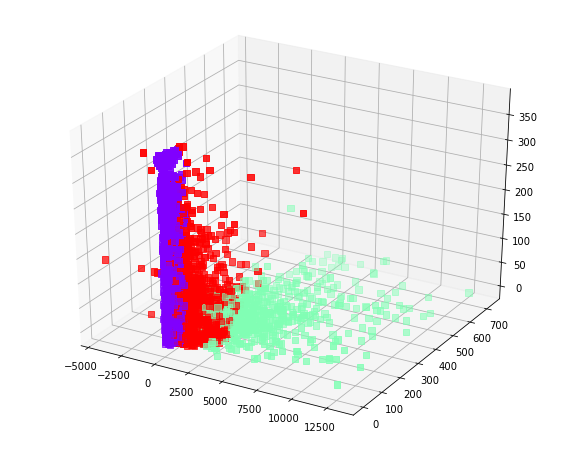

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(d['monetary'])
y = np.array(d['freq'])
z = np.array(d['rec'])
ax.scatter(x,y,z, marker="s", c=d['g_labels'], s=40, cmap="rainbow")

In [84]:
rfm['g_labels'] = labels

# BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies) 

In [85]:
rfm

,rec,freq,monetary,AGG Label,Cluster_Id,db_labels,g_labels
CustID,,,,,,,
12346.0,325,2,0.00,1,1,0,0
12747.0,2,103,4196.01,0,2,1,1
12749.0,3,231,3868.20,0,2,1,1
12820.0,3,59,942.34,2,0,2,2
12821.0,214,6,92.72,1,1,0,0
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,0,0
18281.0,180,7,80.82,1,1,0,0
18282.0,7,13,176.60,2,0,2,0


In [86]:
df_new_birch = rfm[['monetary', 'rec','freq']]

In [87]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

In [88]:
start_time = time.time()



model = Birch(threshold=0.01, n_clusters=3)
model.fit(df_new_birch)
yhat = model.predict(df_new_birch)

time_taken = time.time() - start_time

print(time_taken)

1.062551736831665


In [89]:
df_new_birch['birch_pred'] = yhat

In [90]:
df_new_birch

,monetary,rec,freq,birch_pred
CustID,,,,
12346.0,0.00,325,2,1
12747.0,4196.01,2,103,0
12749.0,3868.20,3,231,0
12820.0,942.34,3,59,1
12821.0,92.72,214,6,1
...,...,...,...,...
18280.0,180.60,277,10,1
18281.0,80.82,180,7,1
18282.0,176.60,7,13,1


In [91]:
rfm['birch_pred'] = yhat

In [92]:
clusters = unique(yhat)
print(clusters)

[0 1 2]


In [93]:
df_new_birch0 = df_new_birch[df_new_birch['birch_pred']== 0]
df_new_birch1 = df_new_birch[df_new_birch['birch_pred']== 1]
df_new_birch2 = df_new_birch[df_new_birch['birch_pred']== 2]

In [94]:
print(silhouette_score(df_new_birch,yhat))

0.71095828357263


# Monetary vs Recency

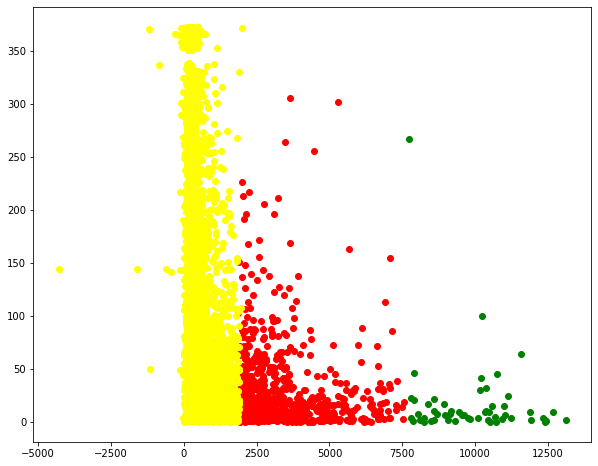

In [95]:
plt.scatter(df_new_birch0['monetary'], df_new_birch0['rec'], c ='r')
plt.scatter(df_new_birch1['monetary'], df_new_birch1['rec'], c ='yellow')
plt.scatter(df_new_birch2['monetary'], df_new_birch2['rec'], c ='g')


# Monetary vs Frequency

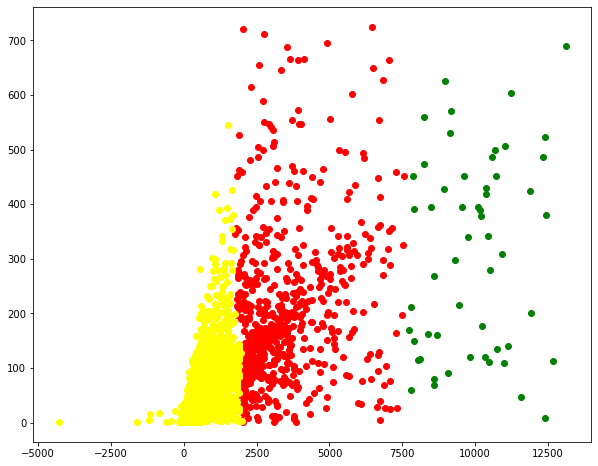

In [96]:
plt.scatter(df_new_birch0['monetary'], df_new_birch0['freq'], c ='r')
plt.scatter(df_new_birch1['monetary'], df_new_birch1['freq'], c ='yellow')
plt.scatter(df_new_birch2['monetary'], df_new_birch2['freq'], c ='g')

# Recency vs Frequency

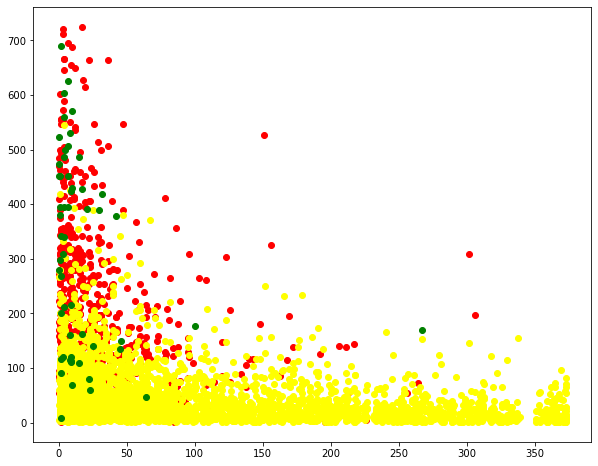

In [97]:
plt.scatter(df_new_birch0['rec'], df_new_birch0['freq'], c ='r')
plt.scatter(df_new_birch1['rec'], df_new_birch1['freq'], c ='yellow')
plt.scatter(df_new_birch2['rec'], df_new_birch2['freq'], c ='g')

# Recency vs Frequecny vs Monetary

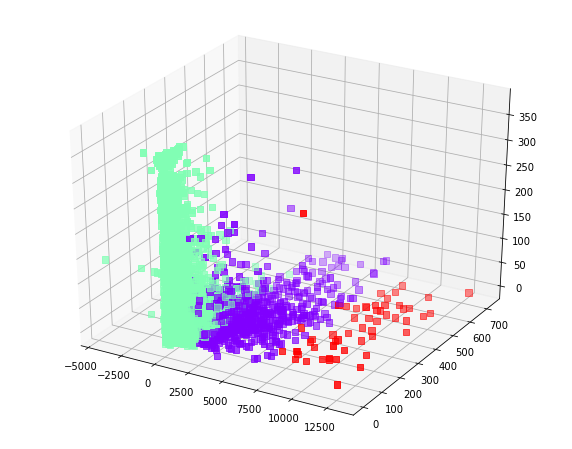

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df_new_birch['monetary'])
y = np.array(df_new_birch['freq'])
z = np.array(df_new_birch['rec'])
ax.scatter(x,y,z, marker="s", c=df_new_birch['birch_pred'], s=40, cmap="rainbow")

# Conclusion

In [99]:
rfm

,rec,freq,monetary,AGG Label,Cluster_Id,db_labels,g_labels,birch_pred
CustID,,,,,,,,
12346.0,325,2,0.00,1,1,0,0,1
12747.0,2,103,4196.01,0,2,1,1,0
12749.0,3,231,3868.20,0,2,1,1,0
12820.0,3,59,942.34,2,0,2,2,1
12821.0,214,6,92.72,1,1,0,0,1
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,0,0,1
18281.0,180,7,80.82,1,1,0,0,1
18282.0,7,13,176.60,2,0,2,0,1


# Cluster Similarity between k-means and hierarchical clustering



In [100]:
sc.metrics.adjusted_rand_score(rfm['Cluster_Id'], rfm['AGG Label'])

0.5873008913221868

# Cluster Similarity between k-means and dbscan



In [101]:
sc.metrics.adjusted_rand_score(rfm['Cluster_Id'], rfm['db_labels'])



0.9966024089294302

# Cluster Similarity between hierarchical clustering and dbscan



In [102]:
sc.metrics.adjusted_rand_score(rfm['AGG Label'],rfm['db_labels'])



0.587991185740579

# Cluster Similarity between hierarchical clustering and Gaussian Mixture Model



In [103]:
sc.metrics.adjusted_rand_score(rfm['AGG Label'],rfm['g_labels'])



0.22728265328367314

# Cluster Similarity between hierarchical clustering and BIRCH Clustering

In [104]:
sc.metrics.adjusted_rand_score(rfm['AGG Label'],rfm['birch_pred'])



0.2775765080032593

# Cluster Similarity between BIRCH Clustering and Gaussian Mixture Model

In [105]:
sc.metrics.adjusted_rand_score(rfm['g_labels'],rfm['birch_pred'])



0.2694710832757447

# Cluster Similarity between BIRCH Clustering and K-Means

In [106]:
sc.metrics.adjusted_rand_score(rfm['Cluster_Id'],rfm['birch_pred'])



0.21660232422654552

# Cluster Similarity between Gaussina Mixture and K-Means

In [107]:
sc.metrics.adjusted_rand_score(rfm['Cluster_Id'],rfm['g_labels'])



0.21164590677344916

# Cluster Similarity between Gaussina Mixture and dbscan

In [108]:
sc.metrics.adjusted_rand_score(rfm['g_labels'],rfm['db_labels'])



0.21182490944804883

# Cluster Similarity between BIRCH Clustering and dbscan

In [109]:
sc.metrics.adjusted_rand_score(rfm['birch_pred'],rfm['db_labels'])

0.21573622569660397